In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy

In [3]:
with open('CholeskyMap_learning_vanilla.pkl', 'rb') as handle:
    all_info = pickle.load(handle)
print(all_info.keys())
#all_info={'L2_dict': L2_dict, 'LSigma':LSigma, 'Sigma':Sigma,
#          'betaz':betaz,'n_samples':Nsamples,'Nmc':Nmc, 'betaz':betaz,
#          'beta_scaling': beta_scaling}

dict_keys(['L2_dict', 'LSigma', 'Sigma', 'betaz', 'n_samples', 'Nmc', 'beta_scaling'])


/var/folders/tc/106jyy157sv7rxwtk7hgpqf00000gn/T/ipykernel_12099/3573930286.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  all_info = pickle.load(handle)


In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
plt.rc('text', usetex=True)
plt.rc('font', size=12)
#plt.rcParams.update({
#"font.family": "sans-serif",
#"font.sans-serif": ["Helvetica"]})
#'text.latex.preamble': r'\usepackage{amsfonts}'})
fontsize=16
methods = ['NN','OTT'] #['ICNN','NN','OTT']
method_label = ['$NN$','$EOT$'] #ICNN
linestyles = ['-','-.',':'] #['-','--',':']
colors = ['#ff7f0e','#d62728'] #'#1f77b4',
plt.figure()
for (k,beta) in enumerate(all_info['betaz']):
    # load ICNN
    for (m,method) in enumerate(methods):
        L2_err_method = all_info['L2_dict'][method][:,:,k]
        L2_err_mean   = np.mean(L2_err_method,axis=0)
        L2_err_std    = np.std(L2_err_method,axis=0)
        # plot result
        if m==1:
            plt.errorbar(all_info['n_samples'], L2_err_mean, yerr=L2_err_std,label=r'$t={}$'.format(beta),\
                        color=colors[m],linestyle=linestyles[k])
        else:
            plt.errorbar(all_info['n_samples'], L2_err_mean, yerr=L2_err_std,\
                        color=colors[m],linestyle=linestyles[k])

# Creating a single legend for all plots
# Adding a single legend outside the subplots
#plt.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 0.75))
#plt.plot(all_info['n_samples'], 1/(all_info['n_samples'])**(2/5),label=r'$O(n^{-2/5})$',color='black',linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.ylim([4e-3,1e-1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Number of samples, $n$',fontsize=fontsize)
plt.ylabel(r'$\mathbb{E}\|\widehat{T}_{t} - T_{CB}\|_{L^2(\rho)}$',fontsize=fontsize)
plt.legend(fontsize=11, loc='lower left')
#plt.savefig('Gaussian_convergence.pdf',bbox_inches='tight')

Error in callback <function _draw_all_if_interactive at 0x10f32b600> (for post_execute), with arguments args (),kwargs {}:


FileNotFoundError: Matplotlib's TeX implementation searched for a file named 'cmss12.tfm' in your texmf tree, but could not find it

FileNotFoundError: Matplotlib's TeX implementation searched for a file named 'cmss12.tfm' in your texmf tree, but could not find it

<Figure size 640x480 with 1 Axes>

In [22]:
with open('CholeskyMap_learning_vanishing_t.pkl', 'rb') as handle:
    all_info = pickle.load(handle)
print(all_info.keys())

dict_keys(['L2_dict_another_try', 'LSigma', 'Sigma', 'betaz', 'n_samples', 'Nmc', 'beta_scaling'])


/var/folders/tc/106jyy157sv7rxwtk7hgpqf00000gn/T/ipykernel_14495/3918707371.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  all_info = pickle.load(handle)


In [21]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
#plt.rc('text', usetex=True)
#plt.rc('font', size=12)
#fontsize=16
methods = ['NN','OTT'] #['ICNN','NN','OTT']
method_label = ['NN ','EOT'] #ICNN
linestyles = ['-','--',':'] #['-','--',':']
colors = ['#ff7f0e','#d62728'] #'#1f77b4',
plt.figure()
for (m,method) in enumerate(methods):
    L2_err_method = all_info['L2_dict_another_try'][method]
    L2_err_mean   = np.mean(L2_err_method,axis=0)
    L2_err_std    = np.std(L2_err_method,axis=0)
    # plot result
    plt.errorbar(all_info['n_samples'], L2_err_mean, yerr=L2_err_std,label=str(method_label[m]),\
                    color=colors[m])
#plt.plot(all_info['n_samples'], 2/(all_info['n_samples'])**(1/5),label=r'$O(n^{-1/2})$',color='black',linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.ylim([4e-2,1e-1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Number of samples, $n$',fontsize=fontsize)
plt.ylabel(r'$\|\widehat{T}_{t} - T_{CB}\|^2_{L^2(\rho)}^2$',fontsize=fontsize)
plt.legend()
#plt.savefig('Gaussian_convergence')

Error in callback <function _draw_all_if_interactive at 0x1146d74c0> (for post_execute), with arguments args (),kwargs {}:


ValueError: 

^
ParseFatalException: Double superscript  (at char 0), (line:1, col:1)

ValueError: 

^
ParseFatalException: Double superscript  (at char 0), (line:1, col:1)

<Figure size 640x480 with 1 Axes>

In [14]:
with open('CholeskyMap_learning_1_over_2_n.pkl', 'rb') as handle:
    all_info = pickle.load(handle)
print(all_info.keys())

dict_keys(['L2_dict_another_try', 'LSigma', 'Sigma', 'betaz', 'n_samples', 'Nmc', 'beta_scaling'])


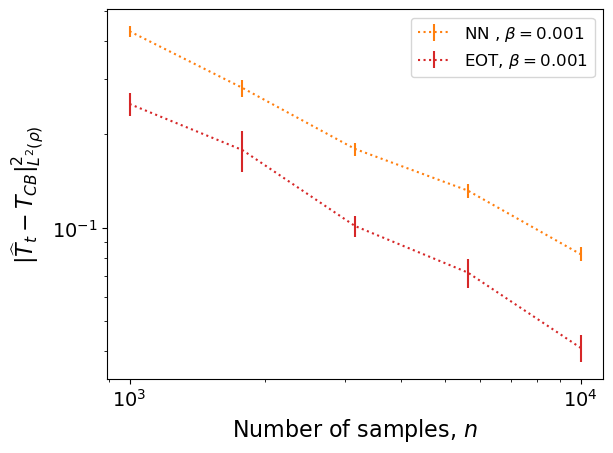

In [15]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
#plt.rc('text', usetex=True)
plt.rc('font', size=12)
fontsize=16
methods = ['NN','OTT'] #['ICNN','NN','OTT']
method_label = ['NN ','EOT'] #ICNN
linestyles = ['-','--',':'] #['-','--',':']
colors = ['#ff7f0e','#d62728'] #'#1f77b4',
plt.figure()
for (m,method) in enumerate(methods):
    L2_err_method = all_info['L2_dict_another_try'][method]
    L2_err_mean   = np.mean(L2_err_method,axis=0)
    L2_err_std    = np.std(L2_err_method,axis=0)
    # plot result
    plt.errorbar(all_info['n_samples'], L2_err_mean, yerr=L2_err_std,label=str(method_label[m])+r', $\beta={}$'.format(beta),\
                    color=colors[m],linestyle=linestyles[k])
#plt.plot(all_info['n_samples'], 2/(all_info['n_samples'])**(1/5),label=r'$O(n^{-1/2})$',color='black',linestyle='--')
plt.xscale('log')
plt.yscale('log')
#plt.ylim([4e-3,1e-1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Number of samples, $n$',fontsize=fontsize)
plt.ylabel(r'$\|\widehat{T}_{t} - T_{CB}\|_{L^2(\rho)}^2$',fontsize=fontsize)
plt.legend()
#plt.savefig('Gaussian_convergence')

In [3]:
with open('CholeskyMap_learning_1_over_3_n.pkl', 'rb') as handle:
    all_info = pickle.load(handle)
print(all_info.keys())

dict_keys(['L2_dict_another_try', 'LSigma', 'Sigma', 'betaz', 'n_samples', 'Nmc', 'beta_scaling'])


/var/folders/tc/106jyy157sv7rxwtk7hgpqf00000gn/T/ipykernel_14495/2161831683.py:2: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  all_info = pickle.load(handle)


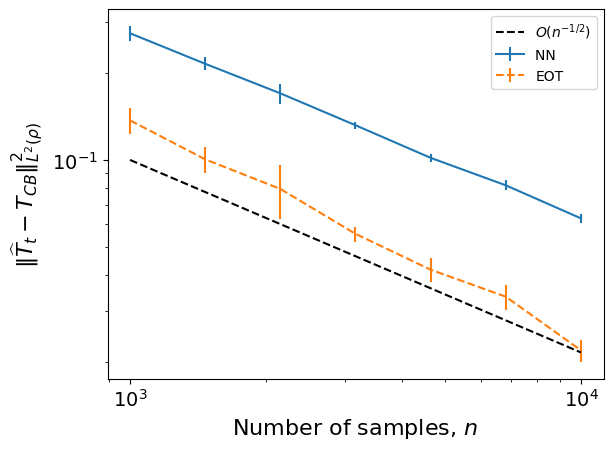

In [12]:
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 20})
#plt.rc('text', usetex=True)
#plt.rc('font', size=12)
fontsize=16
methods = ['NN','OTT'] #['ICNN','NN','OTT']
method_label = ['NN ','EOT'] #ICNN
linestyles = ['-','--',':'] #['-','--',':']
colors = ['#ff7f0e','#d62728'] #'#1f77b4',
plt.figure()
for (m,method) in enumerate(methods):
    L2_err_method = all_info['L2_dict_another_try'][method]
    L2_err_mean   = np.mean(L2_err_method,axis=0)
    L2_err_std    = np.std(L2_err_method,axis=0)
    # plot result
    plt.errorbar(all_info['n_samples'], L2_err_mean, yerr=L2_err_std,label=str(method_label[m]), \
                    linestyle=linestyles[m])
plt.plot(all_info['n_samples'], 10/(all_info['n_samples'])**(2/3),label=r'$O(n^{-1/2})$',color='black',linestyle='--')
plt.xscale('log')
plt.yscale('log')
#plt.ylim([4e-3,1e-1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'Number of samples, $n$',fontsize=fontsize)
plt.ylabel(r'$\|\widehat{T}_{t} - T_{CB}\|_{L^2(\rho)}^2$',fontsize=fontsize)
plt.legend()
#plt.savefig('Gaussian_convergence')